In [47]:
''' import '''
import scipy.io as io
import numpy as np
import numpy.linalg as la
import scipy.sparse as sp
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt

In [48]:
''' load data '''
data = io.loadmat('./data/hw3_prob3.mat')

A = data['A']               # (30720, 65536)
b = data['b']               # (30720, 1)
x_orig = data['x_orig']     # (256, 256)

M, N = x_orig.shape
K, _ = b.shape

In [49]:
''' function '''
def trunc(z, t):
    return np.sign(z)*np.minimum(np.abs(z), t)

# Chambolle-Pock (1d)

In [50]:
''' TV '''
Im = sp.eye(M)
Dn = sp.diags([1, -1, 1], offsets=(-(N-1), 0, 1), shape=(N,N))
D_h = sp.kron(Im, Dn)

In = sp.eye(N)
Dm = sp.diags([1, -1, 1], offsets=(-(M-1), 0, 1), shape=(M,M))
D_v = sp.kron(Dm, In)

In [51]:
''' hyper param '''
MAXITER = 2000
CRIT = 2e-5

MU = 1
# LAMBDA = 0.2 # fn에만 사용됨

L = sla.norm(A)**2
tau = 1 / L
sigma = 1 / (tau*L)

In [52]:
''' Chambolle-Pock (1d) '''

fn_cham = []
xn_cham = []

x = np.zeros((M*N,1))
y1 = np.zeros((K,1))
y2 = np.zeros((M*N,1))
y3 = np.zeros((M*N,1))

for k in range(1, MAXITER):

    x_prev = x # x.flaten()과 차원이 같아야함

    # fn 느리지는 않음
    # fn = (MU/2)*la.norm(A@x - b)**2 + LAMBDA*la.norm(D_h@x, 1) + LAMBDA*la.norm(D_v@x, 1)

    # update y
    y1 = (y1 + sigma*(A@x) - sigma*MU*b) / (1 + sigma*MU)
    y2 = trunc(y2 + sigma*(D_h@x), sigma)
    y3 = trunc(y3 + sigma*(D_v@x), sigma)

    # update x
    x = np.maximum(x - tau*(A.T@y1 + D_h.T@y2 + D_v.T@y3), 0)

    theta = 1 / np.sqrt(1 + 2*MU*tau)
    tau = theta * tau
    sigma = sigma / theta

    x = x + theta*(x - x_prev) # acceleration

    # stop condition
    xcon = la.norm(x - x_prev) / la.norm(x)
    if (k >= 1) and (xcon < CRIT):
        break

    # history
    # fn_cham.append(fn)
    xn_cham.append(xcon)
    print(f'i = {k}, |x-x|/|x| = {xcon}') #, f = {fn:.8f}'

# opt
x_cham = x

i = 1, |x-x|/|x| = 1.0
i = 2, |x-x|/|x| = 0.5993628261480566
i = 3, |x-x|/|x| = 0.41049654470021535
i = 4, |x-x|/|x| = 0.30432361059022406
i = 5, |x-x|/|x| = 0.2380892532095368
i = 6, |x-x|/|x| = 0.19371371262247492
i = 7, |x-x|/|x| = 0.16235075734668472
i = 8, |x-x|/|x| = 0.13922916782403172
i = 9, |x-x|/|x| = 0.12158776438611266
i = 10, |x-x|/|x| = 0.10773941070523116
i = 11, |x-x|/|x| = 0.09660677993676038
i = 12, |x-x|/|x| = 0.0874759080800363
i = 13, |x-x|/|x| = 0.07985819454425801
i = 14, |x-x|/|x| = 0.07340969583931654
i = 15, |x-x|/|x| = 0.06788216388079396
i = 16, |x-x|/|x| = 0.06309238210294163
i = 17, |x-x|/|x| = 0.05890241077642226
i = 18, |x-x|/|x| = 0.05520653192320063
i = 19, |x-x|/|x| = 0.05192241917906862
i = 20, |x-x|/|x| = 0.04898503703976475
i = 21, |x-x|/|x| = 0.04634234280562397
i = 22, |x-x|/|x| = 0.04395220377168893
i = 23, |x-x|/|x| = 0.04178014931865486
i = 24, |x-x|/|x| = 0.039797706771684566
i = 25, |x-x|/|x| = 0.03798115214499867
i = 26, |x-x|/|x| = 0.03631

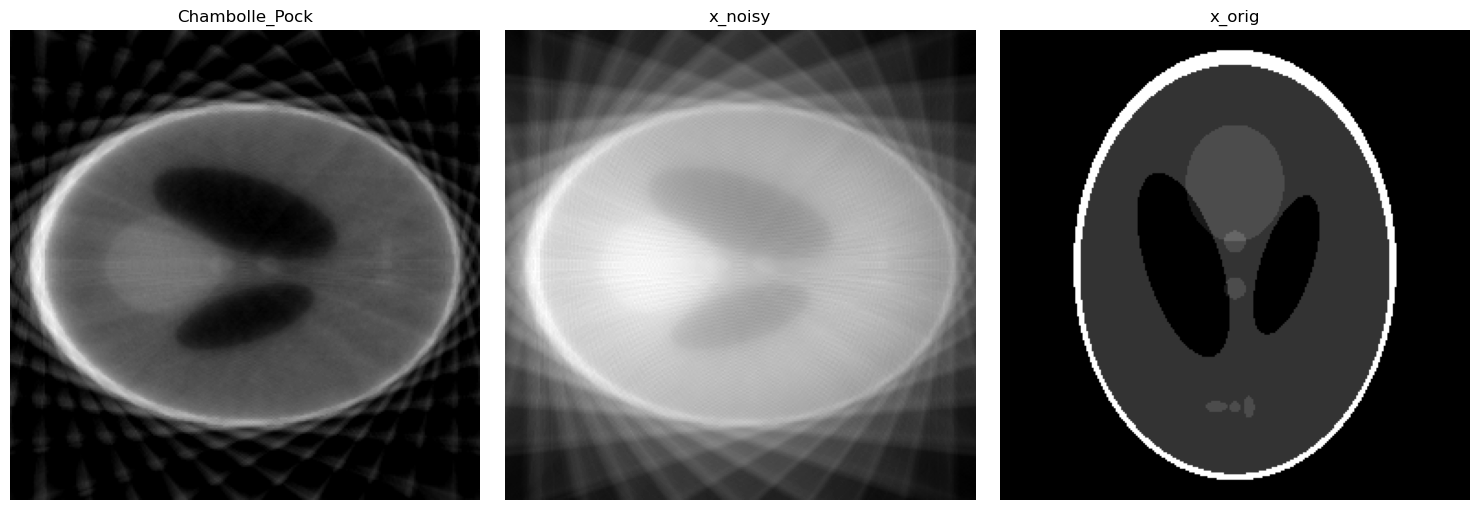

In [53]:
''' plot '''
x_noisy = A.T@b

_, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_cham.reshape(M,N), cmap='gray')
axs[0].set_title('Chambolle_Pock')
axs[0].axis('off')

axs[1].imshow(x_noisy.reshape(M,N), cmap='gray')
axs[1].set_title('x_noisy')
axs[1].axis('off')

axs[2].imshow(x_orig, cmap='gray')
axs[2].set_title('x_orig')
axs[2].axis('off')

plt.tight_layout()
plt.show()

# Chambolle-Pock (1d)
D_h + D_v = D

In [54]:
''' TV '''
D = sp.vstack([D_h, D_v])   # [D_h, D_v] -> 하나로 처리

In [55]:
''' Chambolle-Pock (2d) '''

fn_cham2 = []
xn_cham2 = []

x = np.zeros((M*N,1))
y1 = np.zeros((K,1))
y2 = np.zeros((2*(M*N),1)) # D_h, D_v 하나로 처리

for k in range(1, MAXITER):

    x_prev = x # x.flaten()과 차원이 같아야함

    # fn
    # fn = (MU/2)*la.norm(A@x - b)**2 + LAMBDA*la.norm(D@x, 1)

    # update y
    y1 = (y1 + sigma*(A@x) - sigma*MU*b) / (1 + sigma*MU)
    y2 = trunc(y2 + sigma*(D@x), sigma)

    # update x
    x = np.maximum(x - tau*(A.T@y1 + D.T@y2), 0)

    theta = 1 / np.sqrt(1 + 2*MU*tau)
    tau = theta * tau
    sigma = sigma / theta

    x = x + theta*(x - x_prev) # acceleration

    # stop condition
    xcon = la.norm(x - x_prev) / la.norm(x)
    if (k >= 1) and (xcon < CRIT):
        break

    # history
    # fn_cham2.append(fn)
    xn_cham2.append(xcon)
    print(f'i = {k}, |x-x|/|x| = {xcon}') #, f = {fn:.8f}'

# opt
x_cham2 = x

i = 1, |x-x|/|x| = 1.0
i = 2, |x-x|/|x| = 0.5993504377262506
i = 3, |x-x|/|x| = 0.4104827079590914
i = 4, |x-x|/|x| = 0.3043113235049856
i = 5, |x-x|/|x| = 0.23807917499748843
i = 6, |x-x|/|x| = 0.19370573804269808
i = 7, |x-x|/|x| = 0.16234455981529197
i = 8, |x-x|/|x| = 0.13922439729701508
i = 9, |x-x|/|x| = 0.12158411412726759
i = 10, |x-x|/|x| = 0.10773663263403013
i = 11, |x-x|/|x| = 0.09660468087598735
i = 12, |x-x|/|x| = 0.0874743402643165
i = 13, |x-x|/|x| = 0.07985704568643587
i = 14, |x-x|/|x| = 0.07340888058480073
i = 15, |x-x|/|x| = 0.0678816170403603
i = 16, |x-x|/|x| = 0.06309205351259366
i = 17, |x-x|/|x| = 0.05890226147688352
i = 18, |x-x|/|x| = 0.05520653134938292
i = 19, |x-x|/|x| = 0.051922543099106495
i = 20, |x-x|/|x| = 0.04898526604141597
i = 21, |x-x|/|x| = 0.046342661179435383
i = 22, |x-x|/|x| = 0.04395259868128774
i = 23, |x-x|/|x| = 0.041780610179276326
i = 24, |x-x|/|x| = 0.039798224780463846
i = 25, |x-x|/|x| = 0.037981719922608445
i = 26, |x-x|/|x| = 0.036

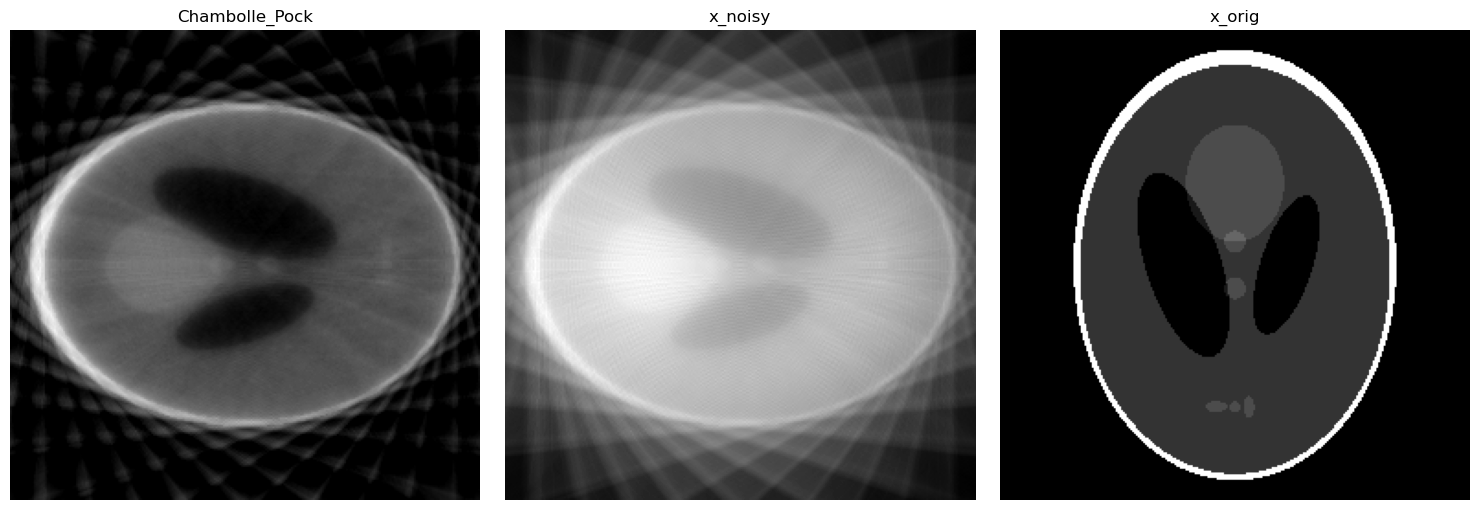

In [56]:
''' plot '''
x_noisy = A.T@b

_, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(x_cham2.reshape(M,N), cmap='gray')
axs[0].set_title('Chambolle_Pock')
axs[0].axis('off')

axs[1].imshow(x_noisy.reshape(M,N), cmap='gray')
axs[1].set_title('x_noisy')
axs[1].axis('off')

axs[2].imshow(x_orig, cmap='gray')
axs[2].set_title('x_orig')
axs[2].axis('off')

plt.tight_layout()
plt.show()